In [1]:
import os
import cv2
import random
import pickle
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
DATA_DIR = 'C:/Users/WasiT/CatAndDog/Datasets'
TRAIN_DATA_DIR = os.path.join(DATA_DIR, 'Train')
TEST_DATA_DIR = os.path.join(DATA_DIR, 'Test')

In [10]:
IMG_SIZE = 64
CATEGORIES = []

for i in os.listdir(TRAIN_DATA_DIR):
    CATEGORIES.append(i)
    
print(CATEGORIES)

['cats', 'dogs']


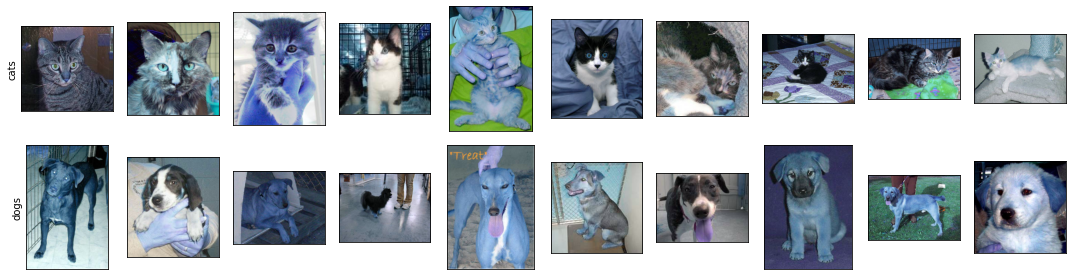

In [11]:
plt.figure(figsize=(15,4))
i=0
for c in CATEGORIES:  
    path = os.path.join(TRAIN_DATA_DIR,c)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.subplot(2,10,i+1)
        plt.imshow(img_array)
        if i%10 == 0:
            plt.ylabel(c)
        plt.xticks([])
        plt.yticks([])
        i += 1
        if i%10 == 0:
            break

plt.tight_layout()        
plt.show()

In [12]:
training_data = []

for c in CATEGORIES:
    path = os.path.join(TRAIN_DATA_DIR, c) 
    class_num = CATEGORIES.index(c) # 0
    for img in tqdm(os.listdir(path)):
        try:
            img_array = cv2.imread(os.path.join(path, img))  
            img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  
            training_data.append([img_resized, class_num]) 
        except Exception as e:
            pass

print(len(training_data))

100%|█████████████████████████████████████████████████████████████████████████████| 4006/4006 [00:12<00:00, 309.03it/s]

8005


In [13]:
test_data = []

for c in CATEGORIES:
    path = os.path.join(TEST_DATA_DIR, c) 
    class_num = CATEGORIES.index(c) 
    for img in tqdm(os.listdir(path)):
        try:
            img_array = cv2.imread(os.path.join(path, img))   
            img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  
            test_data.append([img_resized, class_num])
        except Exception as e:
            pass
print(len(test_data))

100%|█████████████████████████████████████████████████████████████████████████████| 1013/1013 [00:02<00:00, 351.76it/s]

2023


In [14]:
random.shuffle(training_data)
random.shuffle(test_data)

In [15]:
X_train = []
Y_train = []

for img, label in training_data:
    X_train.append(img)
    Y_train.append(label)
    
X_train = np.array(X_train).astype('float32').reshape(-1,64,64,3)
Y_train = np.array(Y_train)

print(f"X_train= {X_train.shape} Y_train= {Y_train.shape}")

X_train= (8005, 64, 64, 3) Y_train= (8005,)


In [16]:
X_test = []
Y_test = []

for features,label in test_data:
    X_test.append(features)
    Y_test.append(label)

X_test = np.array(X_test).astype('float32').reshape(-1, IMG_SIZE, IMG_SIZE, 3)
Y_test = np.array(Y_test)

print(f"X_test= {X_test.shape} Y_test= {Y_test.shape}")

X_test= (2023, 64, 64, 3) Y_test= (2023,)


(8005, 64, 64, 3) (8005,)


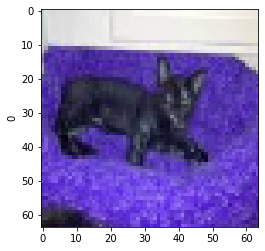

In [17]:
X_train = []
Y_train = []
for img,label in training_data:
    X_train.append (img)
    Y_train.append (label)

X_train = np.array(X_train).astype('float32').reshape (-1,64,64,3)
Y_train = np.array (Y_train)

print (X_train.shape, Y_train.shape)
plt.figure()
plt.imshow(X_train[2000].astype('uint8'))
plt.ylabel(Y_train[2000])
plt.show()

In [18]:
mean_rgb = np.mean(X_train, axis=(0,1,2))
print(mean_rgb)

[ 99.8061  112.19667 123.33912]


In [19]:
X_train_norm = np.empty_like(X_train)
X_test_norm = np.empty_like(X_test)

In [20]:
for i in range(len(X_train)):
    for c in range(3):
        if(c==1):
            X_train_norm[i,:, :, c] = X_train[i,:, :, c] - mean_rgb[0]
        elif(c==2):
            X_train_norm[i,:, :, c] = X_train[i,:, :, c] - mean_rgb[1]
        else:
            X_train_norm[i,:, :, c] = X_train[i,:, :, c] - mean_rgb[2]
            
for i in range(len(X_test)):
    for c in range(3):
        if(c==1):
            X_test_norm[i,:, :, c] = X_test[i,:, :, c] - mean_rgb[0]
        elif(c==2):
            X_test_norm[i,:, :, c] = X_test[i,:, :, c] - mean_rgb[1]
        else:
            X_test_norm[i,:, :, c] = X_test[i,:, :, c] - mean_rgb[2]

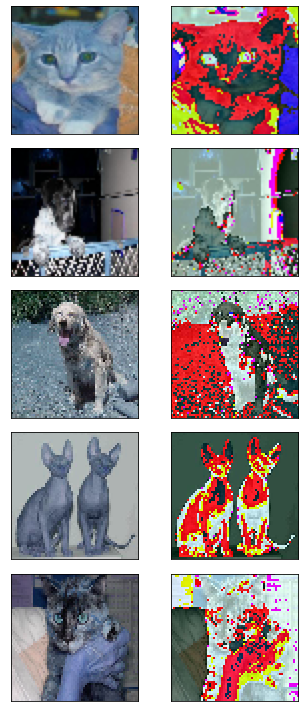

In [21]:
c = 0
plt.figure(figsize=(5,10))
for i in range(5):
    plt.subplot(5,2,c+1)
    plt.imshow(X_train[i].astype('uint8'))
    plt.xticks([])
    plt.yticks([])
    
    plt.subplot(5,2,c+2)
    plt.imshow(X_train_norm[i].astype('uint8'))
    plt.xticks([])
    plt.yticks([])

    c += 2
    
plt.tight_layout()
plt.show()

In [22]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
model = keras.Sequential([
    ## input layer
    keras.Input(shape=X_train_norm.shape[1:]),
    
    layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    
    
    layers.Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    
    layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    
    
    layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    
    
    layers.Flatten(),
    
    layers.Dense(units=4096),
    layers.Activation('relu'),
    layers.Dropout(0.5),
    
    layers.Dense(units=4096),
    layers.Activation('relu'),
    layers.Dropout(0.5),

    layers.Dense(10),
    layers.Activation('softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 64)        1792      
_________________________________________________________________
activation (Activation)      (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 64, 64, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 128)       73856     
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 128)       0

In [23]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001), 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [24]:
cb = EarlyStopping(monitor='val_loss', min_delta=0.02, patience=3, restore_best_weights=True)

h = model.fit(x=X_train_norm, y=Y_train, 
              epochs=15, 
              validation_split=0.2,
              batch_size=16,
              callbacks=[cb]
             )

Epoch 1/15
401/401 [==============================] - 226s 563ms/step - loss: 0.7324 - accuracy: 0.5272 - val_loss: 0.6798 - val_accuracy: 0.5497
Epoch 2/15
401/401 [==============================] - 224s 559ms/step - loss: 0.6391 - accuracy: 0.6366 - val_loss: 0.6297 - val_accuracy: 0.6558
Epoch 3/15
401/401 [==============================] - 233s 582ms/step - loss: 0.5624 - accuracy: 0.7127 - val_loss: 0.5163 - val_accuracy: 0.7601
Epoch 4/15
401/401 [==============================] - 244s 610ms/step - loss: 0.4957 - accuracy: 0.7597 - val_loss: 0.5377 - val_accuracy: 0.7333
Epoch 5/15
401/401 [==============================] - 237s 591ms/step - loss: 0.4327 - accuracy: 0.8020 - val_loss: 0.4837 - val_accuracy: 0.7552
Epoch 6/15
401/401 [==============================] - 230s 572ms/step - loss: 0.3608 - accuracy: 0.8426 - val_loss: 0.4400 - val_accuracy: 0.8076
Epoch 7/15
401/401 [==============================] - 232s 579ms/step - loss: 0.2776 - accuracy: 0.8823 - val_loss: 0.3882 -

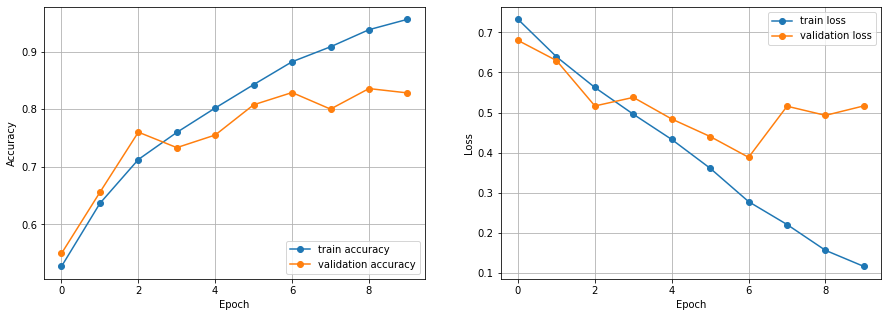

In [25]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [26]:
test_loss, test_acc = model.evaluate(X_test_norm, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

64/64 [==============================] - 12s 184ms/step - loss: 0.4098 - accuracy: 0.8309

Test Accuracy: 0.8309441208839417

Test Loss: 0.4097558856010437
